# Exercise 02.1

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

We compute this integral in 2 ways:
1. standard Monte Carlo quadrature by sampling a uniform distribution in $[0,1]$
2. by using importance sampling

Let's rewrite our integral in a more general way: $I = \int g(x) dx$. Importance sampling consists in finding the best probability distribution $d(x)$ to use in a Monte Carlo calculation, in order to minimize the variance.
$$I = \int \bigg[ \frac{g(x)}{d(x)} \bigg] d(x) dx $$
We have to choose a probability distribution $d(x)$ which has the following features:
- we are able to sample it
- $d(x)$ must be as similar as possible to $g(x)$
- $d(x) > 0 \; \forall x, \; \int d(x) dx =1$

In our case we choose $d'(x)=\frac{\pi}{2}(1-x)$ which well approximates $g(x)$. We have to normalize it in order to fulfil the third requirement: $d(x)=2(1-x)$.

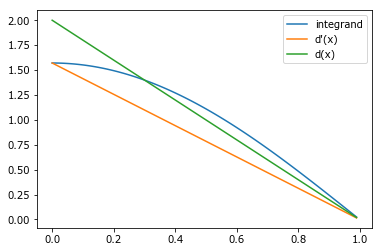

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

pi=3.141592653

def g(x):
    return pi/2*np.cos(pi*x/2)
def d(x):
    return 2*(1-x)

x = np.arange(0,1,0.01)
plt.plot(x, g(x), label='integrand')
plt.plot(x, pi/4*d(x), label="d'(x)")
plt.plot(x, d(x), label='d(x)')

plt.legend()
plt.show()

So the estimation of the integral will be done in the following ways:
1. $I\simeq \frac{1}{M} \sum_{i=1}^M g(x_i)$ where $x_i$ are uniform random numbers in $[0,1]$.
2. $I\simeq \frac{1}{M} \sum_{i=1}^M \frac{g(x_i)}{d(x_i)}$ where $x_i$ are random numbers sampled from $d(x)$ in $[0,1]$.

We plot the estimations of the integral and their uncertainties for both cases as a function of the number of blocks $N$. The simulations are performed with $M=10^4$ throws.

We can see that the statistical error in the estimation of the integral via the importance sampling is drastically reduced.

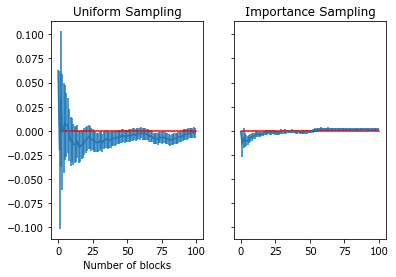

In [17]:
x1, y1, error1 = np.loadtxt("Ex_02.1/Plot_uniform.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x2, y2, error2 = np.loadtxt("Ex_02.1/Plot_imp_samp.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

f, axarr = plt.subplots(1,2,sharey=True)

axarr[0].errorbar(x1, y1, yerr=error1)
axarr[0].plot([1, 50, 100], [0, 0, 0], 'r')
axarr[0].set_title('Uniform Sampling')
axarr[0].set(xlabel='Number of blocks')

axarr[1].errorbar(x2, y2, yerr=error2)
axarr[1].plot([1, 50, 100], [0, 0, 0], 'r')
axarr[1].set_title('Importance Sampling')
axarr[0].set(xlabel='Number of blocks')


plt.show()

# Exercise 02.2

3D random walk simulations:
- on a **cubic lattice** with lattice constant $a=1$: at each step the walker decide a direction ($ \textbf{x}, \textbf{y}, \textbf{z} $) and whether to go forward or backward.
- in the **continuum**: at each discrete time the walker makes a step of length $a=1$ along a random direction. In order to do this we need to sample uniformly the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$. We have to sample $\phi$ from a uniform distribution in $[0,2\pi]$ and $\theta$ from the distribution $p(\theta)=\frac{1}{2}sin \theta$ in $[0,\pi]$. To sample $\theta$ we use the method of the inversion of the cumulative function: if $r$ is a random variable uniformly distributed in $[0,1)$, $\theta=arcos(1-2r)$ is what we need.

We made $M=10^4$ simulations of a random walk of $N=100$ steps in both cases. Here is the graph of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step.

Lattice RW fit parameters:
a =  1.008995508794104
Uniform RW fit parameters:
a =  1.0057948688938527


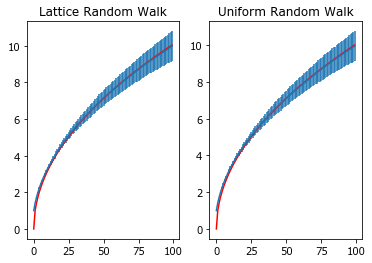

In [24]:
from scipy.optimize import curve_fit

def f(x,a):
    return a*np.sqrt(x)

x1, y1, error1 = np.loadtxt("Ex_02.2/Plot_lattice.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x2, y2, error2 = np.loadtxt("Ex_02.2/Plot_uniform.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

p_opt1, p_cov1 = curve_fit(f, x1, y1)
y_fit1 = f(x1,p_opt1[0])

p_opt2, p_cov2 = curve_fit(f, x2, y2)
y_fit2 = f(x2,p_opt2[0])

f, axarr = plt.subplots(1,2)

axarr[0].errorbar(x1,y1,yerr=error1)
axarr[0].plot(x1,y_fit1, label='fit', color='r') # plotting fitted function
axarr[0].set_title('Lattice Random Walk')
axarr[1].errorbar(x2,y2,yerr=error2)
axarr[1].plot(x2,y_fit2, label='fit', color='r') # plotting fitted function
axarr[1].set_title('Uniform Random Walk')

print('Lattice RW fit parameters:')
print('a = ', p_opt1[0])

print('Uniform RW fit parameters:')
print('a = ', p_opt2[0])

plt.show()


Both results are well fitted by a function $f(N)=a\sqrt{N}$ with $a\simeq1$. Let's see why this indicates a diffusive behaviour. The probability distribution of particles in a random walk satisfy a diffusion equation in the continuum limit: $$\frac{\partial p(x,t)}{\partial t} = D \frac{\partial^2 p(x,t)}{\partial x^2}$$
It is easy to prove that a starting distribution $p(x,t=0)=\delta(x)$ becomes a gaussian function with $<x^2(t)>=2Dt$ at time t. Therefore in the discrete case: $\sqrt{\langle |\vec{r}_N|^2 \rangle} \propto \sqrt{t}\propto \sqrt{N}$.